# Introduction

In this notebook, we will get started by importing and cleaning the LendingClub dataset, which will be used throughout the course.

We will achieve this by leveraging key data cleaning techniques in Python using Pandas, among other libraries.


## Agenda:
1. Importing data for your Data Science project
2. Understanding your data and cleaning it:initial exploration and stats
3. Handling missing values
4. Removing duplicates
5. Handling outliers
6. Text data handling
7. Intro to time series data


Demo: Implementation in Python (Lending Club use case)
------------------------------


---


### Set up

In [1]:
python_material_folder_name = "python-material"

#### User-specified parameters

#### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library import
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = f"drive/MyDrive/DSIF-course-material/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

1\. Importing data for your Data Science project
----------------------------------------

### Flat file (.csv) format
Our data is stored in csv format which is a very popular tabular format, where each line corresponds to a row, and each field within the row is separated by a comma.

Csv is widely used for data exchange and storage, especially for datasets that need to be easily readable and editable with spreadsheet software (like Microsoft Excel) and programming languages (like Python, R).

- Advantages: Simple, easy to create and parse, human-readable.
- Disadvantages: Can become large and unwieldy with big datasets, lacks support for complex data structures.

Let's read our data in using [**pandas**](https://pandas.pydata.org/docs/getting_started/index.html#getting-started), Python's most popular library for data manipulation.

**Note:** Thorughout this course, data will be located in the *data* folder within the code area.

### Other formats
- See [data import cheat sheet(text files, SAS files, Excel files, relational databases, etc.](https://www.datacamp.com/cheat-sheet/importing-data-in-python-cheat-sheet)
- [Read data from APIs](https://medium.com/analytics-lane/python-get-and-process-web-api-data-through-pandas-and-requests-part-1-32127638b463)

In [8]:
# Load the dataset
# Note: optionally, added a 'sample' step to reduce size if facing slowdown/computational challenges.
df = pd.read_csv(f"{path_python_material}/data/1-raw/Loan_status_2007-2020Q3-100ksample.csv")#.sample(100)

# Display the first few rows of the dataset
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [9]:
df.columns[:5]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt'], dtype='object')

In [10]:
df.dtypes[:5]

Unnamed: 0.1      int64
Unnamed: 0        int64
id                int64
loan_amnt       float64
funded_amnt     float64
dtype: object

**Hint**: Check out data types [here](https://pbpython.com/pandas_dtypes.html)

### <span style="color:BLUE"> **>>> DISCUSSION: What are some of the things you notice by just looking at the data?**  </span>    
*Hints*:
- You may want to take a look at the data dictionary provided in the 'data' folder
- Do you understand what each column, and the values within it, is or means?
- Do you notice any inconsistencies or potential areas of concern around data quality or completeness?


2\. Understanding your data and cleaning it: initial exploration and stats
----------------------------------------


As you can probably tell from looking at the above, it is easy to get overwhelmed by trying to scroll through over 100 fields to make sense of the data!
In a real-life scenario, we would want to make sure we spend enough time (weeks if needed!) to deeply understand it and make sure it is ready to be used, by applying some of the techniques covered over the next few sessions.

Let's get started by removing some of the columns that are not needed - this will make our life easier. For that, we will be using the pandas 'drop' method, which takes a list of columns to be dropped as follows:
``` df.drop(labels)``` : where labels is a single column name, or list.


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>
> - Pick 2 columns you would drop from this dataset (be ready to explain why). Create a list called `to_drop`.
> - Drop the columns from your df by passing the list. If you are unsure how to do this, you are allowed to search on Google for the relevant pandas method - it is good to get familiar with searching through documentation.
> - The new dataframe should be called `df_dropped`.   


In [14]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
df_dropped = df.drop(list_to_drop, axis=1)
# axis = 1 - drop by columns
# axis = 0 - drop by indexes

In [15]:
print(f"df shape: {df.shape}")
print(f"df_dropped shape: {df_dropped.shape}")

df shape: (100000, 143)
df_dropped shape: (100000, 141)


**When to consider dropping columns?**
- **business/problem relevance**: is the data relevant to the problem I am trying to solve (e.g. Do I need IDs?)
- **high % of missing values**: especially if the data is not easily recoverable or imputation might introduce significant bias.
- **little to no variance**: provide minimal information for the model and can be dropped.
- **high correlation**: if two or more columns are highly correlated, they contain redundant information. You might drop one of them to reduce 'multicollinearity'.
- **high cardinality**: Categorical columns with too many unique values (high cardinality) can lead to overfitting and increased computational cost. These can be dropped or encoded differently.



### Basic data exploration and stats

In [16]:
# Number of rows and columns
df_dropped.shape

(100000, 141)

#### Numeric columns

The dataset used has 100k rows - for the purposes of this course, a sample is being used for simplicity (original dataset size: circa 3m records covering period between 2007 and 2020).

The describe() method generates descriptive statistics **for numeric columns**. This includes:

- count: Number of non-null entries.
- mean: Average value.
- std: Standard deviation.
- min: Minimum value.
- 25%: 25th percentile (first quartile).
- 50%: 50th percentile (median or second quartile).
- 75%: 75th percentile (third quartile).
- max: Maximum value.

In [17]:
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_dropped.describe()


Descriptive Statistics:


,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,100000.000000,100000.000000,100000.000000,47186.000000,14630.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99994.000000,24602.000000,100000.0,7.166000e+03,7166.000000,100000.000000,97562.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,70356.000000,68227.000000,70356.000000,60315.000000,70356.000000,70356.000000,70356.000000,70343.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,98222.000000,97560.000000,97152.000000,97101.000000,99994.00000,100000.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,97558.000000,97133.000000,99955.000000,99995.000000,9.756200e+04,9.822200e+04,98222.000000,9.756200e+04,6739.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6613.000000,6740.000000,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,700.639200,704.639440,0.554310,35.034269,74.945113,11.688690,0.17770,1.689349e+04,24.040390,4032.024853,4031.436341,12559.494957,12544.530188,9911.414064,2479.307829,1.750509,167.022522,28.605125,3512.909843,690.476220,677.660400,0.017651,44.633322,1.0,1.295764e+05,19.408330,0.003460,208.056907,1.459264e+05,0.928037,2.839175,0.703906,1.616351,20.323259,36927.159276,68.988842,1.250881,2.645076,5999.964339,56.154116,3.639794e+04,1.075232,1.517497,1.998707,4.512166,13757.234143,12779.260859,55.838138,0.00821,10.706750,125.750589,179.950237,14.462444,8.325342,1.507839,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,94.356537,4

This table can be slightly overwhelming to digest, but is very useful to get a sense of our data.

#### Categorical columns

In [18]:
categorical_colunmns = df_dropped.select_dtypes(include=['object']).columns

print("\nNumber of unique values in each column:")
df_dropped[categorical_colunmns].nunique()


Number of unique values in each column:


term                              2
int_rate                        584
grade                             7
sub_grade                        35
emp_title                     40094
emp_length                       11
home_ownership                    6
verification_status               3
issue_d                         159
loan_status                      10
pymnt_plan                        1
url                          100000
purpose                          14
title                          3455
zip_code                        878
addr_state                       51
earliest_cr_line                667
revol_util                     1088
initial_list_status               2
last_pymnt_d                    147
next_pymnt_d                     58
last_credit_pull_d              137
application_type                  2
verification_status_joint         3
sec_app_earliest_cr_line        506
hardship_flag                     2
hardship_type                     6
hardship_reason             

This can be used to further validate our understanding of the data, as well as detect unusual or rare values that may indicate data entry errors, outliers, or irrelevant categories.

E.g.:
- Are we expecting single value of identifiers per record (linked to granularity)
- Does any of the categorical features present too many values, and if so could it be be simplified by grouping them into fewer categories ('enconding')?

Let's look at the values assumed by one of the categorical features.  

One of the variables to look out for is *loan_status*, which will be used for modelling later on:

In [19]:
df_dropped.loan_status.value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

*Useful definitions:*  
- *Defaulted Loan: A loan is considered in default when the borrower fails to make the required payments as agreed in the loan contract. Default typically occurs after missing several payments (usually 90 to 180 days, depending on the type of loan and lender policies).*
- *A loan is charged off when the lender writes off the loan as a bad debt on their financial statements, recognizing it as a loss. This typically happens after the loan has been in default for a significant period, often around 180 days.*


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>    
> Calculate the average loan amount for loans that were charged off


In [28]:
# # Step 1 - Filter on charged off records based on df_dropped.loan_status == "Charged Off" condition
charged_off_loans = df_dropped[df_dropped.loan_status == "Charged Off"]

# # Step 2 - Calculate average size of charged off loan
average_size_loan = charged_off_loans.loan_amnt.mean()
print(f"""Average size of charged off loan:
          {
              average_size_loan
          }""")
#

Average size of charged off loan:
          15784.869589793281


In [29]:
# Tip: How to format your output?
formatted_average_size_loan = f"${average_size_loan:,.2f}"
formatted_average_size_loan

'$15,784.87'

In [30]:
# Let's apply to the entire dataframe

def format_dollar(amount):
    return f"${amount:,.2f}"

# Apply the function to the 'loan_amount' column for display purposes
df_dropped['loan_amount_formatted'] = df_dropped['loan_amnt'].apply(format_dollar)


Note: The above number has been formatted to string, hence while this may be useful to display the result - it will not be useful for analysis/modelling purposes, as seen in the following example:

In [31]:
# As an example:
df_dropped['loan_amount_formatted'].sum()

'$4,000.00$24,000.00$5,000.00$24,000.00$14,000.00$4,000.00$7,200.00$19,500.00$8,925.00$38,275.00$25,600.00$10,000.00$20,000.00$31,200.00$12,000.00$15,000.00$7,000.00$2,400.00$20,000.00$20,000.00$25,000.00$12,000.00$3,600.00$14,000.00$18,475.00$21,000.00$14,325.00$5,925.00$15,000.00$8,000.00$10,000.00$30,000.00$20,000.00$20,000.00$15,000.00$18,000.00$3,500.00$5,000.00$20,000.00$16,000.00$5,600.00$15,450.00$20,000.00$4,725.00$10,975.00$30,000.00$12,000.00$12,000.00$25,000.00$6,000.00$24,000.00$12,000.00$14,000.00$8,000.00$11,500.00$6,000.00$10,000.00$15,000.00$20,000.00$15,425.00$9,000.00$5,875.00$18,000.00$16,175.00$5,625.00$11,900.00$12,000.00$8,000.00$20,000.00$12,000.00$18,000.00$10,625.00$6,000.00$22,500.00$10,000.00$12,500.00$10,000.00$15,000.00$21,000.00$16,000.00$30,000.00$22,000.00$7,000.00$6,500.00$4,000.00$35,000.00$4,800.00$5,000.00$3,000.00$8,000.00$10,800.00$10,400.00$35,000.00$28,000.00$2,200.00$20,000.00$24,000.00$22,400.00$12,000.00$16,800.00$22,000.00$20,000.00$4,000.00

### <span style="color:BLUE"> **>>> DISCUSSION: Can you guess what happened and why?**  </span>    

### <span style="color:BLUE"> **>>> EXERCISE:**  </span>    
> Drop the `loan_amount_formatted` column given it will not be useful for our downstream work.

In [33]:
df_dropped = df_dropped.drop('loan_amount_formatted', axis=1)

In [34]:
df_dropped.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https:/

3\. Handling missing values
----------------------------------------


Identifying and treating missing value is a critical step in data preparation, particularly given many algorithms require a complete dataset to calculate distances, probabilities, and optimize objective functions. It is also a great opportunity to cement our understanding of the features and what they represent.

In Pandas, missing data is represented by two values:
- None: a Python singleton object that is often used for missing data in Python code.
- NaN : acronym for 'Not a Number' - is a special floating-point value recognized by all systems that use the standard IEEE floating-point representatio

**Explanation**
Missing values are common in real-world datasets and need to be handled appropriately. There are several ways to deal with missing values:
- Removal: Dropping rows or columns with missing values.
- Imputation: Filling missing values with a specific value, such as the mean, median, or mode.

**Implementation**

In [35]:
# Checking for missing values
df_dropped.isnull().sum()


id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose                                           0
title       

#### Example approaches

We could leverage the power of Python to create a rule that automatically drops columns with a % of missing values that exceeds a given threshold. However, we **absolutely** need to make sure we understand the data and what missing values **actually** represent.

If unsure, do not drop features at this initial stage, as we will be learning about techniques that can help with feature selection when we get to model building classes.

As an example, let's image data SMEs in the business have advised that 'hardship' related features actually point to customers who are NOT on hardship plan, which may actually be useful information we do not want to discard!

In [36]:
# Create hardship flag based on information provided by data SMEs in the business
df_dropped['hardship_status_filled'] = df_dropped['hardship_status'].fillna("NO_HARDSHIP")
print(f"Nulls after filling: {df_dropped['hardship_status_filled'].isnull().sum()}")
df_dropped[['hardship_status_filled', 'hardship_status']].head(2)

Nulls after filling: 0


,hardship_status_filled,hardship_status
0,NO_HARDSHIP,NaN
1,NO_HARDSHIP,NaN


In [37]:
# Imputation: Filling missing values with the mean for numerical columns
df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)
print(f"Nulls after filling: {df_dropped['num_accts_ever_120_pd'].isnull().sum()}")


Nulls after filling: 0


/var/folders/m8/fmvf_zys6qn9bxrrtd9g44c00000gn/T/ipykernel_43790/2369733154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)


Alternatively, a more radical approach is to drop records when null values appear. This is **not recommended** unless you have confidence that it will meet a business need, or not impact your modelling too much (e.g. overall data is populated, only minor portion of rows have missing values which we want to discard).

In [38]:
# Let's try this 'blanket' approach on our data and see what happens:
df_blanket_drop = df_dropped.dropna(axis=0, how='any')
df_blanket_drop.shape

(1, 142)

As expected, we ended up with very few/no records given the many 'holes' in our dataset. This is very common in practice for such large data sources (and so many features which are often sparsely populated), so if really wanted to use this approach, we may want to restrict dropping based on a subset of features being null.

In [39]:
# Let's try this 'blanket' approach on a subset of fields and see what happens:
df_blanket_drop2 = df_dropped.dropna(axis=0, how='any',subset=['mo_sin_rcnt_rev_tl_op', 'emp_title'])
df_blanket_drop2.shape

(88746, 142)

Alternatively, we can use the 'all' option to only drop records that are completely empty

In [40]:
# Let's try this option and see what happens:
df_blanket_drop3 = df_dropped.dropna(axis=0, how='all')
df_blanket_drop3.shape

(100000, 142)

### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>    
- Can you think of benefits / limitations of above approaches?



4\. Removing duplicates
----------------------------------------

Duplicates can skew your analysis and should be removed to ensure data integrity.

In [41]:
# Checking for duplicate rows
duplicates = df_dropped.duplicated().sum()
duplicates

np.int64(0)

In [42]:
# Removing duplicate rows
df_deduped = df_dropped.drop_duplicates(inplace=True)

try:
    df_deduped.shape # Note: it will fail if empty (i.e. no duplicates)
except:
    print("No duplicates")

No duplicates


### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>    
- Can you think of benefits / limitations of above approaches?
- Do you know why we used the 'try' and 'except' logic?



5\. Handling outliers
----------------------------------------
Outliers can distort statistical analysis and models. They can be genuine outlying observations (e.g.: Black Friday sales spike), or point to data errors (e.g.: manual data entry). In both cases, we would want to account for this and treat them.

Common techniques to **identify** outliers include:

- Z-score: Identifying outliers based on the standard deviation.
- IQR (Interquartile Range): Identifying outliers based on the 25th and 75th percentiles.

### Why is Outlier Detection Important?

Outliers can significantly impact the performance and accuracy of machine learning models and statistical analyses. Here's why detecting and handling outliers is crucial:

1\. **Model Performance:** Outliers can skew model training and lead to poor generalization on unseen data.

2\. **Data Integrity:** Outliers may indicate data entry errors or unusual events that require further investigation.

3\. **Statistical Accuracy:** Outliers can affect summary statistics such as mean, standard deviation, and correlation, leading to misleading conclusions.

4\. **Improved Insights:** Identifying outliers can reveal valuable insights into rare but important events or patterns in the data.

### Use Cases for Outlier Detection

In the context of lending, outlier detection can be used in several ways:

1\. **Fraud Detection:** Outliers in financial transactions or application data could indicate fraudulent activities.

2\. **Credit Risk Analysis:** Unusual loan amounts, incomes or other features (or set of) might signal higher risk applications.

3\. **Data Quality Improvement:** Identifying and correcting outliers can improve the overall quality of the dataset.

### Example Analysis on LendingClub Loan Application Data

Let's perform an outlier detection analysis on LendingClub loan application data using various techniques.

#### Checking for Outliers using Z-score

The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean.


From [investopedia](https://www.investopedia.com/terms/z/zscore.asp#:~:text=Understanding%20Z%2DScore,-Z%2Dscore%20is&text=It%20indicates%20how%20many%20standard,standard%20deviation%20from%20the%20mean.):
> Z-score is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution.

> If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

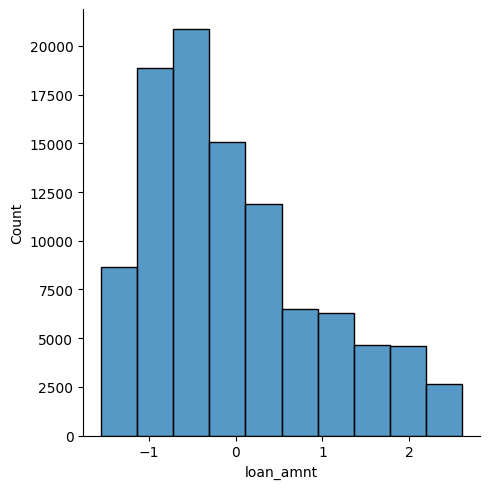

In [44]:
from scipy import stats
import numpy as np

# Calculating on a single column, e.g. loan amount
z_scores = stats.zscore(df_dropped["loan_amnt"])
sns.displot(z_scores, bins = 10)

Observations:
- Loan amount follows a distribution close to normal (a bit 'skewed' to the left)
- Do we have any outliers? This depends on how we define outlier (ie. where we set the threshold), as per example below:

In [45]:
# Threshold = 3
for threshold in range(200, 301, 25):
    thresh = threshold/100
    print(f"Threshold == {thresh}, {df_dropped[np.abs(z_scores)>thresh].shape[0]} outliers ")

Threshold == 2.0, 6602 outliers 
Threshold == 2.25, 2605 outliers 
Threshold == 2.5, 2293 outliers 
Threshold == 2.75, 0 outliers 
Threshold == 3.0, 0 outliers 


Now let's calculate across all numeric features, no longer single feature:

In [46]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df_dropped.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# How many outliers identified for each numerical columns?
gt_thresh = z_scores > threshold
outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
outlier_volume.sort_values(by = "num_outliers"
                          , ascending= False)

,num_outliers
last_pymnt_amnt,2707
out_prncp,2704
out_prncp_inv,2703
delinq_2yrs,2346
num_accts_ever_120_pd,2204
total_rec_int,2130
recoveries,2068
collection_recovery_fee,1982
pub_rec,1807
last_fico_range_low,1790


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>
> Highlight the outlying values for `last_pmnt_amnt`. How do they compare to the rest of the distribution for that same column?


In [48]:
# # YOUR CODE HERE
lpa_outliers = df_dropped[gt_thresh.last_pymnt_amnt == True].last_pymnt_amnt

print(f"Outlying values:\n {len(lpa_outliers)}")
print(f"Distribution details for outliers:\n {lpa_outliers.describe()}")
print(f"Distribution details for non outliers:\n {df_dropped.last_pymnt_amnt.describe()}")

Outlying values:
 2707
Distribution details for outliers:
 count     2707.000000
mean     27983.147204
std       4535.789062
min      22085.850000
25%      24185.605000
50%      27026.730000
75%      30821.065000
max      41557.180000
Name: last_pymnt_amnt, dtype: float64
Distribution details for non outliers:
 count    100000.000000
mean       3512.909843
std        6189.948004
min        -753.180000
25%         264.597500
50%         584.085000
75%        3979.382500
max       41557.180000
Name: last_pymnt_amnt, dtype: float64


### Visualizing Outliers
Visualizing outliers can help understand their distribution and impact.
Boxplots (a.k.a. box and whisker plots) can be used to visualise distributions and outliers.


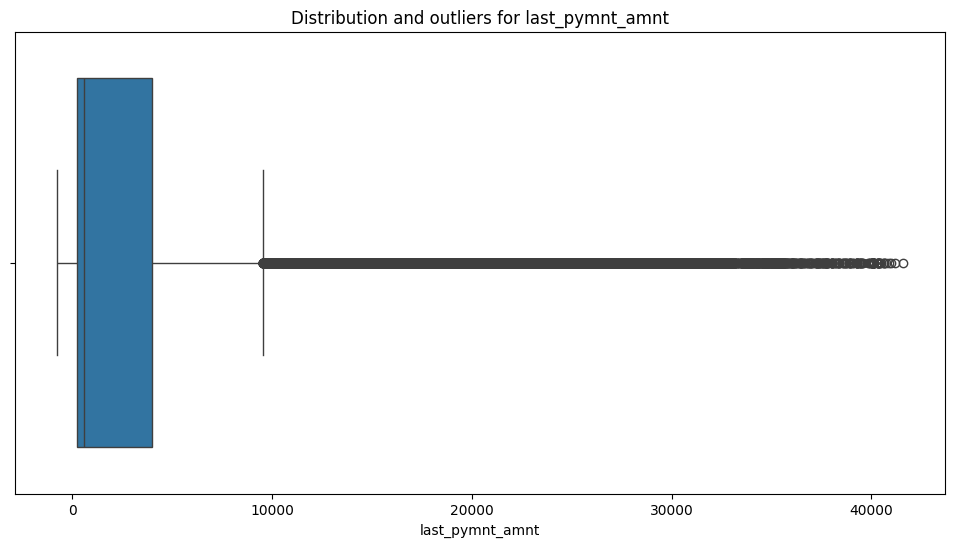

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "last_pymnt_amnt"

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


Do you notice anything unusual in the chart above?

The number of outliers is indeed different - this is because the library used adopts a differnt methodology to identify outliers, based on Interquantile Range. You can read more details [here](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/).



### Once detected, handling outliers

Once outliers have been identified - what do we do with them?

Outliers can be handled in several ways, including removal, transformation, or capping.


In [50]:
# Option 1 - Removing outliers
field_to_treat = "last_pymnt_amnt"

df_no_outliers = df_dropped[(z_scores[field_to_treat] < threshold)]
df_no_outliers.shape

(97293, 142)

In [51]:
# Option 2 - Transforming field affected by outliers
field_to_treat_log = f"{field_to_treat}_log"

df_dropped[field_to_treat_log] = np.log1p(df_dropped[field_to_treat])
print(f"Maximum value of z score after taking log: {max(np.abs(stats.zscore(df_dropped[field_to_treat_log].dropna())))}") # Added dropna() as some NAs returned (ideally to be fixed, for illustrative purposes only)

Maximum value of z score after taking log: 2.617481711906071


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Value to be applied as cap: 17440.045999999995
Maximum value of z score after capping: 2.84188853711322


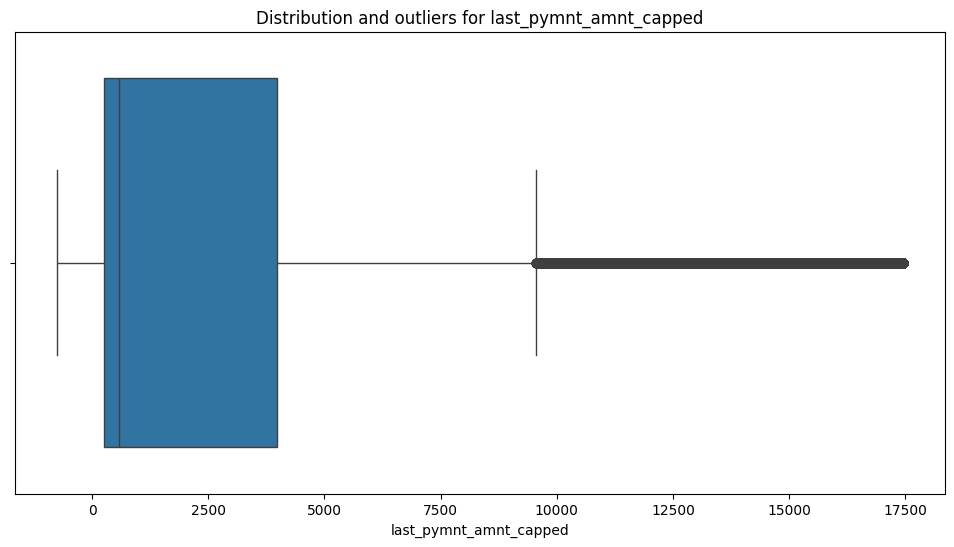

In [52]:
# Option 3 - Capping outliers
field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df_dropped[field_to_treat].quantile(0.95)
print(f"Value to be applied as cap: {cap_value}")

df_dropped[field_to_treat_capped] = np.where(df_dropped[field_to_treat] > cap_value, cap_value, df_dropped[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df_dropped[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Note: Capping will change the distribution, and as a result you may still see outliers.

#### Measuring Impact of Outlier Analysis

Tracking the effectiveness of outlier analysis involves comparing model performance before and after handling outliers.



### Conclusion

By detecting and handling outliers, we can improve the quality of the dataset and the performance of predictive models. In this example, we used the Z-score method for outlier detection and demonstrated various techniques for handling outliers.

### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>    
- Can you think of benefits / limitations of above approaches?



6\. Text data handling
----------------------------------------

Text data often requires cleaning, such as converting to lowercase, removing special characters, and trimming whitespace.

Let us assume we needed to extract the loan ID from the url feature (not the case here, since this is already in the Id column)


In [53]:
df_dropped['url'].value_counts()[:5]

url
https://lendingclub.com/browse/loanDetail.action?loan_id=167338079    1
https://lendingclub.com/browse/loanDetail.action?loan_id=693399       1
https://lendingclub.com/browse/loanDetail.action?loan_id=119962746    1
https://lendingclub.com/browse/loanDetail.action?loan_id=161374059    1
https://lendingclub.com/browse/loanDetail.action?loan_id=74591293     1
Name: count, dtype: int64

In [54]:
import re

def extract_loan_id_from_url(mystring):
    keyword = '='
    before_keyword, keyword, after_keyword = mystring.partition(keyword)
    return after_keyword

df_dropped['loan_id_extracted'] = df_dropped['url'].apply(extract_loan_id_from_url)
df_dropped[['id','url','loan_id_extracted']][:5]

,id,url,loan_id_extracted
0,167338079,https://lendingclub.com/browse/loanDetail.acti...,167338079
1,71016917,https://lendingclub.com/browse/loanDetail.acti...,71016917
2,39589826,https://lendingclub.com/browse/loanDetail.acti...,39589826
3,134798709,https://lendingclub.com/browse/loanDetail.acti...,134798709
4,127097355,https://lendingclub.com/browse/loanDetail.acti...,127097355


Let's check how employment title is populated:

In [55]:
print("Number of unique titles:", df_dropped['emp_title'].value_counts().shape[0])
df_dropped['emp_title'].value_counts()[:10]

Number of unique titles: 40094


emp_title
Teacher             1709
Manager             1547
Owner                812
Registered Nurse     691
Driver               685
RN                   651
Supervisor           590
Sales                515
Office Manager       469
Project Manager      441
Name: count, dtype: int64

This is likely too granular for us.
Let's start by cleaning this list up and make it consistent (e.g.: "Manager" and "manager")

In [56]:
# Cleaning text data
df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()
df_dropped['emp_title_clean'].value_counts()[:10]

emp_title_clean
teacher             2121
manager             2062
owner               1245
registered nurse    1019
driver              1008
supervisor           978
sales                765
rn                   758
office manager       670
truck driver         612
Name: count, dtype: int64

In [57]:
df_dropped['emp_title_manager'] = df_dropped['emp_title_clean'].str.contains("manager")
df_dropped['emp_title_manager'].value_counts()

emp_title_manager
False    77148
True     13898
Name: count, dtype: int64

In [58]:
selected_columns = df_dropped[["emp_title_manager", "emp_title_clean"]]
unique_combinations = selected_columns.drop_duplicates()
unique_combinations.head(10)

,emp_title_manager,emp_title_clean
0,False,cashier
1,False,abm
2,False,driver
3,NaN,NaN
4,False,shipping clerk
5,False,csr
6,False,cdc lll
7,False,snr scientist
9,False,pharmacist
10,False,billing specialist



### Joining to external data

Even after this initial cleaning, the number of job families is still very granular for analysis (92!).
The Lending Club business has created an internal mapping document provided (see `data/1-raw/emp_title_mapping.csv` file).

We will now be joining our data to this reference file to be able to leverage the same categories adopted by the business.

In [59]:
ref_job_families = pd.read_csv(f"{path_python_material}/data/1-raw/emp_title_mapping.csv")
ref_job_families.head()

print(f"Number of existing job families: {ref_job_families.Category.nunique()}")

Number of existing job families: 32


In [60]:
df_mapped = pd.merge(left = df_dropped
                     , right = ref_job_families
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )


Let's perform a basic quality check by counting number of records before and after join:

In [61]:
print(df_dropped.shape, df_mapped.shape)

(100000, 147) (102265, 149)


The number of records has increased, which is a sign that something has gone wrong. **Can you think of a reason for it?**

**Further reading**: (more on joins [here](https://www.atlassian.com/data/sql/sql-join-types-explained-visually) )

In [62]:
# Let's check if there are any duplicates in the reference file:
print(ref_job_families.shape)
print(ref_job_families.drop_duplicates().shape)

(91, 2)
(89, 2)


In [63]:
# The problem can be seen by grouping the ref data by job title and category:
row_count = ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')
row_count[row_count['count'] > 1]

,Category,Job Title,count
17,Education,teacher,2
35,Healthcare,medical assistant,2


In [64]:
ref_job_families[ref_job_families["Job Title"] == "medical assistant"]


,Job Title,Category
70,medical assistant,Healthcare
88,medical assistant,Healthcare


There you go! There are duplicates in the reference files which we want to remove to ensure 1:1 mapping of job families to the reference file. Let's remove duplicates and join again:

In [65]:
ref_job_families_deduped = ref_job_families.drop_duplicates()
print(ref_job_families.shape, ref_job_families_deduped.shape)

(91, 2) (89, 2)


In [66]:
df_mapped_deduped = pd.merge(left = df_dropped
                     , right = ref_job_families_deduped
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )


In [67]:
print(df_dropped.shape, df_mapped_deduped.shape)

(100000, 147) (100000, 149)


The files are both of the same size now.

This example showed the importance of checking for key data quality indicators like row count.

### Data export
Before moving to the last section on time series, let's export our data to the "intermediate" data folder.

In [68]:
df_mapped_deduped.to_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif2.csv"
                        , index = False)

## 7. Time series data

Working with time series data in Python and Pandas involves several key considerations to ensure data is properly handled and cleaned for analysis and modeling. Here are the main aspects to focus on:

### Date Parsing
Ensure that the date/time information is correctly parsed and set as the DataFrame index for efficient time-based operations.


In [ ]:
# Extracting features from date column
df_dropped['issue_d'] = pd.to_datetime(df_dropped['issue_d'])


### Creation of time series
A time series is just a pandas DataFrame or Series that has a time based index.
Let's create a time series for illustrative purposes.

In [ ]:
ts_loans = pd.DataFrame(df_dropped.groupby("issue_d").count()["id"],
                       index = None)
ts_loans.head()

In [ ]:
# Let's check type of our index is as expected
ts_loans.index

### Missing values

Missing values in time series has a particular implication - as often we will be expecting or requiring continuous time series, where observations exist for each period (e.g. each day). This is not always the case, for instance when working with intermittent time series where observations may not occur in each period (e.g. for rare events like earthquake data or sales of a specific SKU).


In [ ]:
ts_loans.index.to_series().diff()[:5]

When continuous data is expected, there are techniques to deal with missing values such as [interpolation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html), forward-fill or backward-fill.

### Resampling
Resampling involves changing the frequency of the time series data, which can be useful for aggregating or downsampling data


From [pydata](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling) :
    
    pandas has a simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.
    resample() is a time-based groupby, followed by a reduction method on each of its groups. See some cookbook examples for some advanced strategies.

In [ ]:
# Resample to monthly frequency, using mean for aggregation
ts_loans_yearly = ts_loans.resample('Y').sum() # Alternatively, use mean()

ts_loans_yearly

### Plotting time series

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set the Seaborn style
sns.set(style="darkgrid")

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=ts_loans_yearly.index, y=ts_loans_yearly['id'])

# Adding titles and labels
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

### Feature engineering

This can be done both on our time series (e.g.: time-based features such as lags, rolling statistics, and date/time components), as well as on our original dataset.



In [ ]:
df_dropped['year'] = df_dropped['issue_d'].dt.year
df_dropped['month'] = df_dropped['issue_d'].dt.month
df_dropped['day'] = df_dropped['issue_d'].dt.day
df_dropped['week'] = df_dropped['issue_d'].dt.isocalendar().week

### Outliers and understanding time series components
In the "Time series modelling in Financial Services" session in a few weeks time, we will be looking at how to handle outlier and also separate out the different components that make up time series data, such as trend and seasonality.



## Further reading

- Pandas library: https://pandas.pydata.org/docs/getting_started/index.html#getting-started
- SQL vs. pandas: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
- Pandas cheat sheet: https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python
- Other libraries for data quality: https://www.telm.ai/blog/8-essential-python-libraries-for-mastering-data-quality-checks/

# End of session

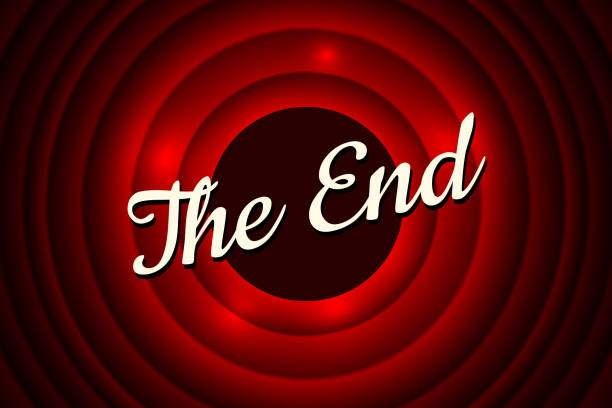

In [69]:
from IPython.display import Image
Image(filename=f"{path_python_material}/images/the-end.jpg", width=500)


### <span style="color:BLUE"> **>>> ADDITIONAL EXERCISES (optional):**  </span>
Apply cleaning techniques to additional features and document your findings.
